# Final Project

## Framing

**Introduction**: The dataset I'm working wiht are conference proceedings in cognitive and learning sciences from 1995-2015. I'm looking forward to seeing what practitioners and researchers were thinking about and working on and how current events shaped what people were interested in researching, especially as it relates to educational technology and psychology. 

**Research question(s)**: What trends persist and change in the learning sciences over the past 20 years? Are there decades or 5-year periods where more trends change than others? Are some technology-focused, especially as we move into the 2010s? 

**Hypotheses**:
    * Describe 2-3 hypotheses that you're planning to test with your dataset
    1. As we get later into the conference proceedings (2006-2015), there will be a greater focus on technology in the classroom and, conversely, social emotional learning, as well, in comparison to 1995-2005.
    These are based on recent publications and a stronger focus in the last 5-10 years on the importance of expanding education past the rigid parameters set up by the US schooling system. Since these are international conferences, social-emotional learning will become increasingly prevalent. 
    * Each hypoteses should be based on academic research (cite a paper) and/or background knowledge that you have about the dataset if you've collected it yourself (e.g., if you've conducted interviews)
    * Each hypotheses should be formulated as an affirmation (and not a question)
    * You can also describe alternative hypotheses, if you think that your results could go either way (but again, have a rationale as for why)

**Results**:
    * how are you planning to test each hypothesis? What models are you thinking of using?
I will be using a comparison of word means, cosine similiarity and network analysis to demonstrate which years are most similar and which trends persist over time.  
    * what are the best results you can hope for? Is that interesting / relevant for other researchers?
The best results would demonstrate strong connections between papers within the same 5 year period or at least within the same conference, demonstrating a unity across the field as to what's important. Since this is the first time this dataset has been examined, I hope that these methods will be good practice for me and interesting for other interested in doing corpus-related analysis, like co-word analysis or social network analysis. 
    * what are implications of your potential findings for practioners?
Elucidating trends can inform practitioners' use of these technologies or social emotional learning and point them in the directions that the field is moving in so they can find supports for areas they have issues with. 

**Threads**
    * Describe issues that might arise during the analyses above
Few papers elucidate how they do coword analysis. Because of this, I am going to be focusing on trying to demonstrate how similar years are and their centralities to each other. Just looking at means and how different each year's vocabulary are will help show these trends changing and persisting over time. 
    * Come up with backup plans in case you run into theses issues
Because issues did and continued to come up, I was forced to interpret based on the degree centrality and betweenness centralities, as well as the similiarities between years and their vocabularies to indicate which trends are persisting across which decades. 

## Data Exploration

What we have: 
- 20 years of abstracts from ISLS and CSCL conferences
Measures: 
- Cosine similarity: demonstrates how similar two vectors are by measuring the cosine between the two of them, helps interpret if things are similar even if they are far away from one another 
- Degree centrality: how connected certain nodes are to other nodes within a network
- Betweenness centrality: how much control the node has over the network in that it has the largest number of shortest paths between it and other nodes

## Data Cleaning

In [1]:
import glob
files = glob.glob("/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/*.txt")
print(files)

['/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts1999.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts1998.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2015.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2014.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2000.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2002.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2013.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2007.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts2012.txt', '/Users/sophiemann/Desktop/Harvard/Computational Methods/Final Project/Abstracts/abstracts

In [2]:
#creating a dictionary with the years + abstracts 
year_abstracts = {}

for filename in files: 
    with open (filename, "r", encoding='utf-8', errors='ignore') as f:
        content_of_file = f.read()
        # get the year of these abstracts
        year = filename.replace('.txt','').split('abstracts')[-1]
        # get a list of abstracts using split
        list_abstracts = content_of_file.split('\n\n')
        # save the data to your dictionary
        year_abstracts[year] = list_abstracts


In [3]:
#create a list of the abstracts
for year, list_of_abstracts in year_abstracts.items(): 
    for i, abstract in enumerate(list_of_abstracts):
        list_of_abstracts[i] = list_of_abstracts[i].lower()

For some reason I had to remove stop words, punctuation, etc. from both list_of_abstract and year_abstracts, which is a dictionary. I am not sure what went wrong that made this this case, but here it is anyway!

In [4]:
punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '”', '“', '’']


# remove punctuation
for i,abstract in enumerate(list_of_abstracts): 
    for punc in punctuation: 
        abstract = abstract.replace(punc, ' ')
    list_of_abstracts[i] = abstract
print(list_of_abstracts[0])

 this paper reports the synthesis of six case studies of students  engagement in inquiry based learning activities in an undergraduate geology course  details of how students engaged in the scientific inquiry practices of formulating explanations from evidence  and communicating and justifying  proposed  explanations  are  presented   data  for  this  study  included  classroom observations  and  archival  data   i e    student  work  samples   collected  during  a  semester long investigation   the  results  suggest  that  students  were  able  to  appropriate  these  inquiry  practices with varying degrees of success  however  it was not without its challenges   a detailed discussion of the ways in which students were successful  and where they had challenges engaging in these inquiry  practices  is  presented   with  the  goal  of  helping  guide  practitioners  and  researchers  in creating learning environments that can take full advantage of the pedagogical strategy of inquiry ba

In [5]:
punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '”', '“', '’']

for year in year_abstracts:
    for i, abstract in enumerate(year_abstracts[year]):
        for punc in punctuation:
            abstract = abstract.replace(punc, ' ')
        year_abstracts[year][i] = abstract

In [32]:
for i,abstract in enumerate(list_of_abstracts): 
    for num in range(10):
        abstract = abstract.replace(str(num), '')
    list_of_abstracts[i] = abstract
print(list_of_abstracts[0])

 reports synthesis six case studies  engagement inquiry activities undergraduate geology course  details engaged scientific inquiry practices formulating explanations evidence  communicating justifying  proposed  explanations   presented   data     included  observations   archival  data   e      samples   collected  during   semester long investigation     suggest     able   appropriate   inquiry  practices varying degrees success  however  without its challenges   detailed discussion ways successful  where challenges engaging inquiry  practices   presented     goal   helping  guide  practitioners   researchers  creating take full advantage pedagogical strategy inquiry  


In [33]:
for year in year_abstracts:
    for i, abstract in enumerate(year_abstracts[year]):
        for punc in punctuation:
            abstract = abstract.replace(str(num), '')
        year_abstracts[year][i] = abstract

In [34]:
for i,abstract in enumerate(list_of_abstracts):  
    abstract = [x for x in abstract.split() if len(x) > 2]
    abstract = " ".join(abstract)
    list_of_abstracts[i] = abstract

print(list_of_abstracts[0][:1000])

reports synthesis six case studies engagement inquiry activities undergraduate geology course details engaged scientific inquiry practices formulating explanations evidence communicating justifying proposed explanations presented data included observations archival data samples collected during semester long investigation suggest able appropriate inquiry practices varying degrees success however without its challenges detailed discussion ways successful where challenges engaging inquiry practices presented goal helping guide practitioners researchers creating take full advantage pedagogical strategy inquiry


In [35]:
for year in year_abstracts: 
    for i,abstract in enumerate(year_abstracts[year]):  
        abstract = [x for x in abstract.split() if len(x) > 2]
        abstract = " ".join(abstract)
        year_abstracts[year][i] = abstract

In [36]:
#remove stop words
stop_words =['in', 'this', 'in this paper', 'students', 'as', 'from', 'knowledge',
            'teachers', 'were', 'these', 'work', 'education', 'school', 'how', 'two', 'student', 'which', 'was',
            'about', 'paper', 'more', 'between', 'used', 'our', 'results',
            'using', 'or', 'they', 'such', 'both', 'at', 'also', 'and', 'two', 'a', 'an', 'it',
            'is', 'the', 'in', 'to', 'that', 'learning', 'this', 'on', 'we', 'with', 'their', 
            'study', 'research', 'are', 'have', 'knowledge', 'teachers', 'based', 'by', 'were', 
            'these', 'of', 'the', 'for', 'school', 'how', 'two', 's', 'student', 'can', 'have', 'use', 
            'understanding', 'more', 'between', 'model', 'our', 'results', 'using','problem', 'not',
            'one', 'or', 'been', 'through', 'I', 'i', 'what', 'there', 'had', 'but', 'uses', 'has', 
            'will', 'be', 'abstract', 'abstract:', 'cid', ':cid', 'cid:', 'cscl', '2', 'new',
            'findings', 'approach', 'classroom', 'system', 'groups', 'within', 'environments', 
            'different', 'three', 'science','1']

for i,abstract in enumerate(list_of_abstracts):
    for stop_word in stop_words:
        abstract = abstract.replace(' ' + stop_word + ' ', ' ')
    list_of_abstracts[i] = abstract
print(list_of_abstracts)

['reports synthesis six case studies engagement inquiry activities undergraduate geology course details engaged scientific inquiry practices formulating explanations evidence communicating justifying proposed explanations presented data included observations archival data samples collected during semester long investigation suggest able appropriate inquiry practices varying degrees success however without its challenges detailed discussion ways successful where challenges engaging inquiry practices presented goal helping guide practitioners researchers creating take full advantage pedagogical strategy inquiry', 'collins ferguson introduced idea epistemic games forms interpret repeatable patterns expert behavior sciences framework extended educational researchers understand activity classrooms tuminaro redish computer games shaffer informal shaffer suggests productive ways epistemic forms may exploited exhibit design museums encourage stronger scientific conversations however much conve

In [7]:
stop_words =['in', 'this', 'in this paper', 'students', 'as', 'from', 'knowledge',
            'teachers', 'were', 'these', 'work', 'education', 'school', 'how', 'two', 'student', 'which', 'was',
            'about', 'paper', 'more', 'between', 'used', 'our', 'results',
            'using', 'or', 'they', 'such', 'both', 'at', 'also', 'and', 'two', 'a', 'an', 'it',
            'is', 'the', 'in', 'to', 'that', 'learning', 'this', 'on', 'we', 'with', 'their', 
            'study', 'research', 'are', 'have', 'knowledge', 'teachers', 'based', 'by', 'were', 
            'these', 'of', 'the', 'for', 'school', 'how', 'two', 's', 'student', 'can', 'have', 'use', 
            'understanding', 'more', 'between', 'model', 'our', 'results', 'using','problem', 'not',
            'one', 'or', 'been', 'through', 'I', 'i', 'what', 'there', 'had', 'but', 'uses', 'has', 
            'will', 'be', 'abstract', 'abstract:', 'cid', ':cid', 'cid:', 'cscl', '2', 'new', 
            'findings', 'approach', 'classroom', 'system', 'groups', 'within', 'environments', 
            'different', 'three', 'science', '1']
for year in year_abstracts:
    for i, abstract in enumerate(year_abstracts[year]):
        for stop_word in stop_words:
            abstract = abstract.replace(' ' + stop_word + ' ', ' ')
        year_abstracts[year][i] = abstract
print(year_abstracts[year])

[' reports synthesis six case studies  engagement inquiry activities undergraduate geology course  details engaged scientific inquiry practices formulating explanations evidence  communicating justifying  proposed  explanations   presented   data     included  observations   archival  data   e      samples   collected  during   semester long investigation     suggest     able   appropriate   inquiry  practices varying degrees success  however  without its challenges   detailed discussion ways successful  where challenges engaging inquiry  practices   presented     goal   helping  guide  practitioners   researchers  creating take full advantage pedagogical strategy inquiry  ', ' collins ferguson  1993  introduced idea epistemic games forms interpret repeatable patterns expert behavior sciences   framework  extended   educational  researchers   understand   activity   classrooms   tuminaro   redish   2005     computer  games   shaffer   2005   informal     shaffer   2004        suggests 

In [8]:
#get the word frequencies for each year in dictionaries 
from collections import defaultdict
import pandas as pd
wordfreqs = {}




for year in range(1995, 2016):
    if year == 2001 or year == 2003 or year == 2006:
        continue
        
    wordfreqs[year] = defaultdict(int)
    
    for abstract in year_abstracts[str(year)]:
        df = pd.DataFrame()
        for word in abstract.split():
            wordfreqs[year][word] += 1
            
wordfreqs

{1995: defaultdict(int,
             {'reports': 10,
              'synthesis': 4,
              'six': 15,
              'case': 29,
              'studies': 42,
              'engagement': 8,
              'inquiry': 55,
              'activities': 37,
              'undergraduate': 8,
              'geology': 1,
              'course': 25,
              'details': 3,
              'engaged': 16,
              'scientific': 43,
              'practices': 52,
              'formulating': 1,
              'explanations': 21,
              'evidence': 25,
              'communicating': 1,
              'justifying': 3,
              'proposed': 3,
              'presented': 15,
              'data': 50,
              'included': 8,
              'observations': 8,
              'archival': 1,
              'e': 28,
              'samples': 1,
              'collected': 9,
              'during': 29,
              'semester': 1,
              'long': 4,
              'investigation': 5,


In [9]:
df = pd.DataFrame.from_dict(wordfreqs, orient='index')

In [10]:
freq_word=[]

for word in df.columns:
    freq_word.append(df[word].sum())
  
a = sorted(freq_word)
#a is a list with the top 25 words
a = a[-25:]
#b tells us that column # whatever is in the top 25 words
b=[]

#creates a list b that has the words n their freqs

for i,value in enumerate(freq_word):
    for j in range(0,25):
        if value == a[j]:
            b.append(i)
            
#gives us a df with rows as years and how frequently the top 25 words show up in that year
df_new = pd.DataFrame()
for i in set(b):
    df1 = df[df.columns[i]]
    df_new = pd.concat([df_new, df1], axis=1, sort=False)
#year and frequencies of each of the top words 
df_new = df_new.fillna(value = 0)
df_new

,inquiry,activities,practices,information,data,environment,process,teacher,collaborative,group,...,online,computer,collaboration,design,community,learners,technology,project,interaction,support
1995,55,37,52,34,50,46,44,43,43,56,...,27.0,26,19,105,33,46,47,41,12.0,45
1996,2,18,3,3,4,15,7,8,1,5,...,1.0,18,3,28,8,3,5,11,0.0,16
1997,11,10,5,9,4,18,10,8,34,14,...,0.0,19,23,11,5,6,10,6,2.0,22
1998,10,16,5,4,2,26,11,9,11,14,...,3.0,19,9,64,10,15,18,26,6.0,21
1999,10,12,4,19,18,22,15,10,56,17,...,10.0,36,36,52,27,24,25,27,21.0,39
2000,44,19,7,24,52,58,31,27,39,19,...,51.0,24,22,154,19,17,49,82,31.0,74
2002,26,52,18,36,23,69,39,35,159,52,...,49.0,73,85,75,47,39,55,25,46.0,97
2004,15,13,13,13,14,20,14,24,7,6,...,10.0,11,4,30,18,16,18,18,3.0,16
2005,11,19,2,10,22,24,25,13,94,28,...,51.0,24,38,74,27,35,20,18,24.0,26
2007,16,53,31,62,26,35,34,27,103,85,...,83.0,47,65,65,39,42,48,22,42.0,56


In [11]:
#find word means across all years
colmeans = df_new.mean()
meansdf = pd.DataFrame(colmeans)
meansdf.columns = ['means']
meansdf

,means
inquiry,31.111111
activities,36.833333
practices,30.944444
information,25.666667
data,39.944444
environment,34.444444
process,32.277778
teacher,32.111111
collaborative,81.055556
group,49.388889


In [12]:
#split into two decades for comparisons 
#df of each word from 1995-2004
rows1 = df_new.loc[[1995, 1996, 1997, 1998, 1999, 2000, 2002, 2004, 2005]]
#df of each word from 2005-2015
rows2 = df_new.loc[[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]]
#means of each new df
row1means = rows1.mean()
row2means = rows2.mean()
#those means and words as dfs
row1means = pd.DataFrame(row1means)
row2means = pd.DataFrame(row2means)

In [13]:
#means of each word from 1995-2005
print(row1means)
#means of each word from 2006-2015
print(row2means)

                       0
inquiry        20.444444
activities     21.777778
practices      12.111111
information    16.888889
data           21.000000
environment    33.111111
process        21.777778
teacher        19.666667
collaborative  49.333333
group          23.444444
tools          20.777778
analysis       27.111111
development    25.555556
social         21.444444
activity       17.444444
online         22.444444
computer       27.777778
collaboration  26.555556
design         65.888889
community      21.555556
learners       22.333333
technology     27.444444
project        28.222222
interaction    16.111111
support        39.555556
                        0
inquiry         41.777778
activities      51.888889
practices       49.777778
information     34.444444
data            58.888889
environment     35.777778
process         42.777778
teacher         44.555556
collaborative  112.777778
group           75.333333
tools           31.333333
analysis        70.777778
development 

In [14]:
sums = pd.DataFrame(df_new.sum(axis = 0))
sums.sort_values(by = [0], ascending = False)

,0
design,1744.0
collaborative,1459.0
support,941.0
group,889.0
analysis,881.0
online,747.0
data,719.0
collaboration,715.0
social,682.0
activities,663.0


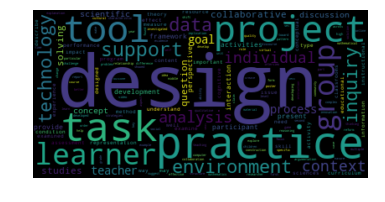

In [30]:
#wordcloud showing preliminary trends 
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt

text = str(list_of_abstracts)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Below is some topic modeling that proved less fruitful than anticipated. It's possible this is because there are so few words, but I left it in here, since it still seems interesting; I am just not really sure if it tells me anything relevant. 

In [16]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to df
    model.fit(df_new)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

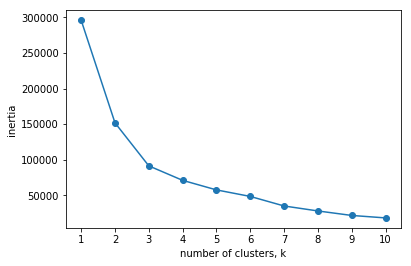

In [17]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

[[ 52.66666667  39.66666667  54.          28.33333333  66.33333333
   36.5         37.5         47.66666667  57.16666667  50.33333333
   26.5         63.5         56.5         44.83333333  29.16666667
   37.66666667  25.          22.33333333 139.66666667  33.33333333
   44.5         40.66666667  36.33333333  22.66666667  55.66666667]
 [  9.83333333  14.66666667   5.33333333   9.66666667  10.66666667
   20.83333333  13.66666667  12.          33.83333333  14.
   12.83333333  16.          12.66666667  14.83333333  15.
   12.5         21.16666667  18.83333333  43.16666667  15.83333333
   16.5         16.          17.66666667   9.33333333  23.33333333]
 [ 30.83333333  56.16666667  33.5         39.          42.83333333
   46.          45.66666667  36.66666667 152.16666667  83.83333333
   38.83333333  67.33333333  41.16666667  54.          34.33333333
   74.33333333  50.83333333  78.         107.83333333  39.83333333
   42.5         48.66666667  29.16666667  47.66666667  77.83333333]]


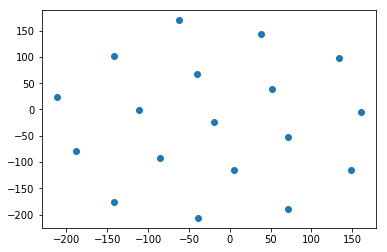

In [18]:
clusterer = KMeans(n_clusters=3,random_state=30).fit(df_new)

centers = clusterer.cluster_centers_

c_preds = clusterer.predict(df_new)



print(centers)

df_new['cluster_kmeans'] = c_preds


from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df_new)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys)
plt.show()

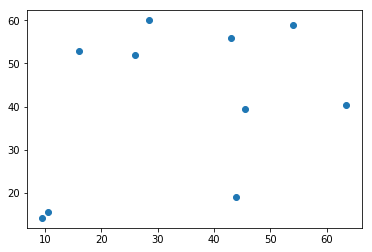

In [19]:
model = KMeans(n_clusters=10)
df_features = model.fit(df_new)
centers= df_features.cluster_centers_
plt.scatter(centers[:,0], centers[:,1])

In [20]:
kmeans_results = KMeans(n_clusters=3).fit(df_new)
for n in range (kmeans_results.n_clusters):
    print("Cluster ", n, ": ", end=" ")
    centroid= kmeans_results.cluster_centers_[n]
    indices= centroid.argsort()
    for i in indices:
        print((list(df_new)[i]), end=" ")
        
    print(" ")

Cluster  0 :  cluster_kmeans project inquiry practices activity teacher tools information community development learners data process environment interaction technology computer social activities analysis online support collaboration group design collaborative  
Cluster  1 :  cluster_kmeans collaboration interaction computer tools information activity community project environment process online activities technology learners social teacher group inquiry practices support development collaborative analysis data design  
Cluster  2 :  cluster_kmeans practices interaction information inquiry data teacher online development tools process group activities social activity community analysis technology learners project collaboration environment computer support collaborative design  


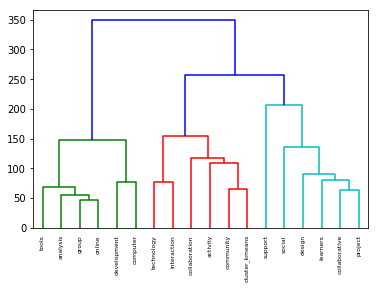

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


mergings = linkage(df_new, method='complete')

# Plot the dendrogram with the words and totals 
dendrogram(mergings,
           labels = df_new.columns,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

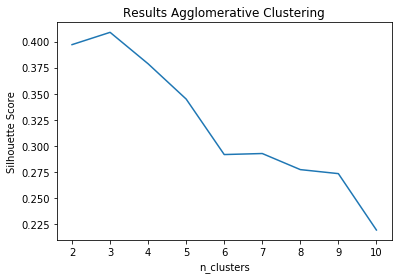

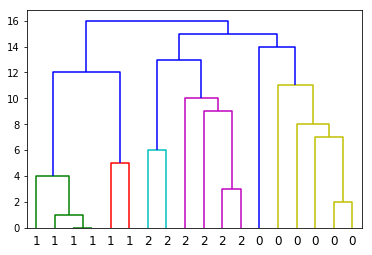

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram


#dendrogram with clusters
def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendrogram(linkage_matrix, **kwargs)



scores = []



for i in range(2,11):

    agglo = AgglomerativeClustering(n_clusters=i)
    agglo.fit(df_new)
    scores.append(silhouette_score(df_new, agglo.labels_))



plt.plot(range(2,11), scores);
plt.title('Results Agglomerative Clustering')
plt.xlabel('n_clusters');
plt.ylabel('Silhouette Score');
plt.show()



clusterer = AgglomerativeClustering(n_clusters=3,linkage='complete').fit(df_new)
c_preds = clusterer.fit_predict(df_new)
plot_dendrogram(clusterer, labels=clusterer.labels_)
plt.show()
df_new['cluster_agglom'] = c_preds

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
#df with yearsxyears with their relative frequencies 
cos_sim = pd.DataFrame(index = df_new.index, columns = df_new.index)

for i in range(df_new.shape[0] - 1): 
    c = df.shape[0] - i - 1
    v1 = np.array(df_new.iloc[i])
    for j in range(c):
        d = j + i + 1
        v2 = np.array(df_new.iloc[d])
        dot = np.dot(v1, v2)
        norma = np.linalg.norm(v1)
        normb = np.linalg.norm(v2)
        cos = dot / (norma * normb)
        cos_sim.iloc[i,d] = cos 
        cos_sim.iloc[d,i] = cos

In [25]:
cos_sim = cos_sim.fillna(value = 1)
cos_sim

,1995,1996,1997,1998,1999,2000,2002,2004,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015
1995,1.000000,0.777284,0.743590,0.869610,0.851748,0.886785,0.821017,0.953956,0.826350,0.844636,0.959508,0.862909,0.958293,0.882676,0.961561,0.864264,0.941199,0.888746
1996,0.777284,1.000000,0.649402,0.857501,0.739670,0.769169,0.707570,0.793444,0.623531,0.632902,0.749585,0.644954,0.697118,0.702180,0.716335,0.654925,0.718268,0.681853
1997,0.743590,0.649402,1.000000,0.682747,0.893668,0.658622,0.937361,0.701607,0.809530,0.835232,0.768055,0.852164,0.701151,0.871877,0.741006,0.850847,0.621292,0.847552
1998,0.869610,0.857501,0.682747,1.000000,0.845899,0.903285,0.745696,0.845346,0.757850,0.702102,0.865905,0.734584,0.787197,0.792161,0.824369,0.767806,0.816301,0.771106
1999,0.851748,0.739670,0.893668,0.845899,1.000000,0.843193,0.952442,0.819235,0.918545,0.890294,0.895997,0.906407,0.808344,0.939383,0.861777,0.914717,0.767859,0.922567
2000,0.886785,0.769169,0.658622,0.903285,0.843193,1.000000,0.757544,0.875134,0.807600,0.753260,0.881169,0.771078,0.864179,0.846487,0.883980,0.812547,0.831933,0.810243
2002,0.821017,0.707570,0.937361,0.745696,0.952442,0.757544,1.000000,0.774101,0.917333,0.923696,0.864342,0.941049,0.789185,0.955252,0.831090,0.932139,0.711857,0.935621
2004,0.953956,0.793444,0.701607,0.845346,0.819235,0.875134,0.774101,1.000000,0.770240,0.790355,0.879390,0.769211,0.905113,0.819970,0.906565,0.783319,0.895888,0.805114
2005,0.826350,0.623531,0.809530,0.757850,0.918545,0.807600,0.917333,0.770240,1.000000,0.923889,0.902966,0.940974,0.851484,0.962855,0.866407,0.962416,0.774822,0.958091
2007,0.844636,0.632902,0.835232,0.702102,0.890294,0.753260,0.923696,0.790355,0.923889,1.000000,0.911111,0.957844,0.828559,0.960618,0.831792,0.953631,0.762818,0.934066


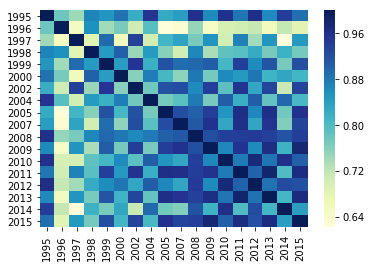

In [26]:
import seaborn as sns
sns.heatmap(cos_sim, cmap="YlGnBu")

In [27]:
import networkx as nx
# Transform it in a links data frame (3 columns only) to make it neater:
links = cos_sim.stack().reset_index()
links.columns = ['var1', 'var2','value']
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[(links['value']> 0.80) & (links['var1'] != links['var2']) ]
print(links_filtered)

     var1  var2     value
3    1995  1998  0.869610
4    1995  1999  0.851748
5    1995  2000  0.886785
6    1995  2002  0.821017
7    1995  2004  0.953956
8    1995  2005  0.826350
9    1995  2007  0.844636
10   1995  2008  0.959508
11   1995  2009  0.862909
12   1995  2010  0.958293
13   1995  2011  0.882676
14   1995  2012  0.961561
15   1995  2013  0.864264
16   1995  2014  0.941199
17   1995  2015  0.888746
21   1996  1998  0.857501
40   1997  1999  0.893668
42   1997  2002  0.937361
44   1997  2005  0.809530
45   1997  2007  0.835232
47   1997  2009  0.852164
49   1997  2011  0.871877
51   1997  2013  0.850847
53   1997  2015  0.847552
54   1998  1995  0.869610
55   1998  1996  0.857501
58   1998  1999  0.845899
59   1998  2000  0.903285
61   1998  2004  0.845346
64   1998  2008  0.865905
..    ...   ...       ...
282  2013  2010  0.881779
283  2013  2011  0.982844
284  2013  2012  0.886141
286  2013  2014  0.808216
287  2013  2015  0.968525
288  2014  1995  0.941199
291  2014  1

In [28]:
links_filtered_sorted = links_filtered.sort_values(by = 'value', ascending=False)
links_filtered_sorted

,var1,var2,value
283,2013,2011,0.982844
249,2011,2013,0.982844
215,2009,2015,0.976818
317,2015,2009,0.976818
230,2010,2012,0.972950
264,2012,2010,0.972950
321,2015,2013,0.968525
287,2013,2015,0.968525
251,2011,2015,0.966782
319,2015,2011,0.966782


[(1995, 1998, {'weight': 0.869609860124981}), (1995, 1999, {'weight': 0.8517482167941044}), (1995, 2000, {'weight': 0.8867848070485654}), (1995, 2002, {'weight': 0.821017008042151}), (1995, 2004, {'weight': 0.953956499923827}), (1995, 2005, {'weight': 0.8263495203416}), (1995, 2007, {'weight': 0.844636197071183}), (1995, 2008, {'weight': 0.9595077447869398}), (1995, 2009, {'weight': 0.8629088256492388}), (1995, 2010, {'weight': 0.9582928825477572}), (1995, 2011, {'weight': 0.8826762663325998}), (1995, 2012, {'weight': 0.9615605366024047}), (1995, 2013, {'weight': 0.8642644711592744}), (1995, 2014, {'weight': 0.9411990123054094}), (1995, 2015, {'weight': 0.8887461681482832}), (1996, 1998, {'weight': 0.857501164129554}), (1997, 1999, {'weight': 0.8936680008715399}), (1997, 2002, {'weight': 0.9373608281264207}), (1997, 2005, {'weight': 0.8095295711898596}), (1997, 2007, {'weight': 0.8352317695128684}), (1997, 2009, {'weight': 0.8521636178077997}), (1997, 2011, {'weight': 0.871876795761698

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/anaconda3/lib/python3.7/sit

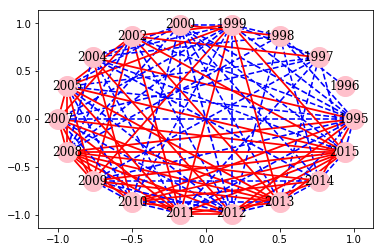

In [37]:
# Build your graph
# G = nx.from_pandas_edgelist(links_filtered, source = 'var1', target = 'var2', edge_attr = True)
# # Plot the network:
# plt.figure(figsize=(20,10))
# nx.draw(G, with_labels=True, node_color='pink', node_size=400, edge_color='black',  font_size=15)
# plt.show()

#network with different 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
links_filtered = links_filtered.reset_index(drop=True)
Graph = nx.Graph()

node_list = list(set(links_filtered["var1"]))
for node in node_list:
    Graph.add_node(node)

pos=nx.circular_layout(Graph) 
nx.draw_networkx_nodes(Graph,pos,node_color='pink',node_size=400)

for i in range(len(links_filtered)):
    Graph.add_edge(links_filtered["var1"][i], links_filtered["var2"][i], weight=links_filtered["value"][i])
print(Graph.edges(data=True))


all_weights = []
for (node1, node2, data) in Graph.edges(data=True):
    all_weights.append(data["weight"])

unique_weights = list(set(all_weights))

for weight in unique_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in Graph.edges(data=True) if edge_attr['weight']==weight]
    width = weight*len(node_list)*10.0/sum(all_weights)
    if weight > 0.9:
        nx.draw_networkx_edges(Graph,pos,edgelist=weighted_edges,width=width, edge_color='b', style='dashed')
    else:
        nx.draw_networkx_edges(Graph,pos,edgelist=weighted_edges,width=width, edge_color='r')
        
nx.draw_networkx_labels(Graph,pos,font_size=12,font_family='serif')
plt.show()

In [ ]:
import matplotlib.colors as mcolors
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, node_color=list(measures.values()),nodelist=measures.keys())

    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

pos = nx.spring_layout(G)  

draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

In [ ]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

In [ ]:
nx.transitivity(G)
nx.density(G)

In [ ]:
deg_cen = list(nx.degree_centrality(G).values())
bet_cent = list(nx.betweenness_centrality(G).values())

In [ ]:
#degree centrality
N, K = G.order(), G.size()
avg_deg = float(K)/N

G_d = G.to_directed()
in_degrees = G_d.in_degree() # dictionary node:degree
in_values_unsorted = [val for (node, val) in in_degrees]
in_values = sorted(set(in_values_unsorted))
in_hist = [in_values_unsorted.count(x) for x in in_values]

out_degrees = G_d.out_degree() # dictionary node:degree
out_values_unsorted = [val for (node, val) in out_degrees]
out_values = sorted(set(out_values_unsorted))
out_hist = [out_values_unsorted.count(x) for x in out_values]


plt.figure()
plt.plot(in_values,in_hist,'ro-') # in-degree
plt.plot(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('abstract network')

plt.show()

In [ ]:
ccs = nx.clustering(G)

avg_clust = sum(ccs.values()) / len(ccs)

G_components = nx.connected_component_subgraphs(G)
G_components = list(G_components)
G_mc = G_components[0]

In [ ]:
# Betweenness centrality

deg_cen = nx.degree_centrality(G_mc)
bet_cen = nx.betweenness_centrality(G_mc)
# Closeness centrality

clo_cen = nx.closeness_centrality(G_mc)

In [ ]:
#shows us how strongly connect each year is to other years based on these pretty colors 
import plotly_express as px
px.scatter(links_filtered, x = 'var1', y = 'var2', color = 'value', size = 'value', size_max = 10)